In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#Load in data
dogData = pd.read_csv('dogData.csv')
dogData.index = dogData['PetID']
catData = pd.read_csv('catData.csv')
catData.index = catData['PetID']

## Dog response variable cleaning

In [3]:
dogData.head(3)

,PetID,Age,Quantity,Fee,VideoAmt,PhotoAmt,AdoptionSpeed,HasName_0,HasName_1,NameLen,...,hope,kind,little,lovely,mother,playful,siblings,smart,sweet,trained
PetID,,,,,,,,,,,,,,,,,,,,,
3422e4906,3422e4906,1,1,0,0,7,3,0,1,6,...,0,0,0,0,1,0,0,0,0,0
5842f1ff5,5842f1ff5,4,1,150,0,8,2,0,1,4,...,0,0,0,0,0,0,0,0,0,0
850a43f90,850a43f90,1,1,0,0,3,2,0,1,6,...,0,0,0,0,0,1,0,0,0,0


In [4]:
dogData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7688 entries, 3422e4906 to a83d95ead
Data columns (total 100 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   PetID                                     7688 non-null   object 
 1   Age                                       7688 non-null   int64  
 2   Quantity                                  7688 non-null   int64  
 3   Fee                                       7688 non-null   int64  
 4   VideoAmt                                  7688 non-null   int64  
 5   PhotoAmt                                  7688 non-null   int64  
 6   AdoptionSpeed                             7688 non-null   int64  
 7   HasName_0                                 7688 non-null   int64  
 8   HasName_1                                 7688 non-null   int64  
 9   NameLen                                   7688 non-null   int64  
 10  NameNumWords               

In [5]:
dogData.AdoptionSpeed.value_counts() 

4    2283
2    2051
3    1849
1    1348
0     157
Name: AdoptionSpeed, dtype: int64

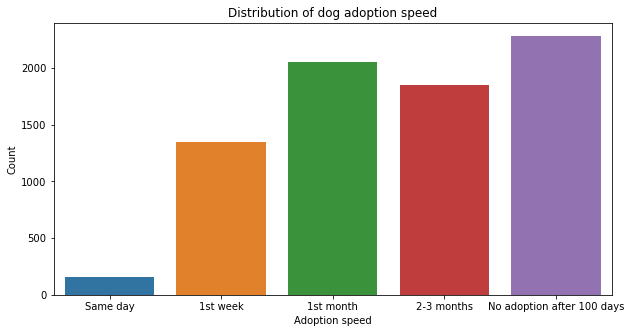

In [6]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = 'AdoptionSpeed', y = 'PetID', data=dogData.groupby(['AdoptionSpeed']).count().reset_index())
plt.xticks(np.arange(0,5), ['Same day', '1st week', '1st month', '2-3 months', 'No adoption after 100 days'])
plt.ylabel('Count')
plt.title('Distribution of dog adoption speed')
plt.xlabel('Adoption speed')
plt.show()

Convert response variable into binary. 0: within 100 days, 1: after 100 days.

In [7]:
dogData.AdoptionSpeed = np.where((dogData.AdoptionSpeed == 4), 1, 0)

In [8]:
dogData.AdoptionSpeed.value_counts()

0    5405
1    2283
Name: AdoptionSpeed, dtype: int64

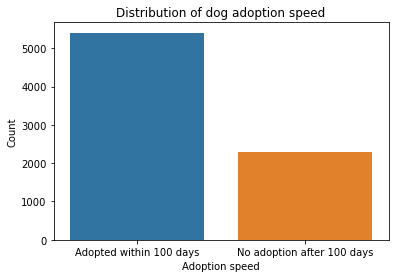

In [9]:
ax = sns.barplot(x = 'AdoptionSpeed', y = 'PetID', data=dogData.groupby(['AdoptionSpeed']).count().reset_index())
plt.xticks(np.arange(0,2), ['Adopted within 100 days', 'No adoption after 100 days'])
plt.ylabel('Count')
plt.title('Distribution of dog adoption speed')
plt.xlabel('Adoption speed')
plt.show()

Save cleaned dog dataframe to CSV.

In [10]:
dogData.drop(columns = 'PetID', inplace = True)
dogData.to_csv (r'cleanedDogData.csv', index = True, header=True)

## Cat response variable cleaning

In [11]:
catData.AdoptionSpeed.value_counts() 

2    1793
4    1687
1    1610
3    1253
0     233
Name: AdoptionSpeed, dtype: int64

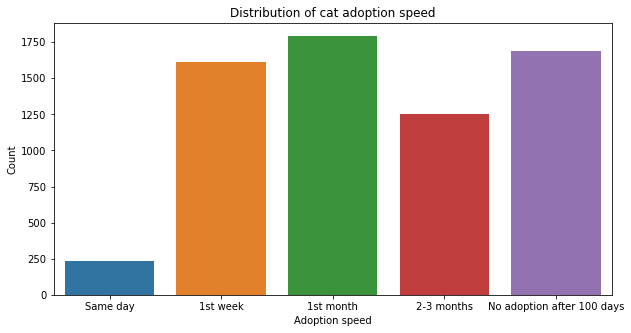

In [12]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x = 'AdoptionSpeed', y = 'PetID', data=catData.groupby(['AdoptionSpeed']).count().reset_index())
plt.xticks(np.arange(0,5), ['Same day', '1st week', '1st month', '2-3 months', 'No adoption after 100 days'])
plt.ylabel('Count')
plt.title('Distribution of cat adoption speed')
plt.xlabel('Adoption speed')
plt.show()

Convert response variable into binary. 0: within 100 days, 1: after 100 days.

In [13]:
catData.AdoptionSpeed = np.where((catData['AdoptionSpeed'] == 4), 1, 0)
catData.AdoptionSpeed.value_counts()

0    4889
1    1687
Name: AdoptionSpeed, dtype: int64

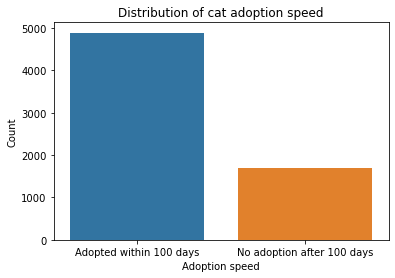

In [14]:
ax = sns.barplot(x = 'AdoptionSpeed', y = 'PetID', data=catData.groupby(['AdoptionSpeed']).count().reset_index())
plt.xticks(np.arange(0,2), ['Adopted within 100 days', 'No adoption after 100 days'])
plt.ylabel('Count')
plt.title('Distribution of cat adoption speed')
plt.xlabel('Adoption speed')
plt.show()

Save cleaned cat dataframe to CSV.

In [15]:
catData.drop(columns = 'PetID', inplace = True)
catData.to_csv(r'cleanedCatData.csv', index = True, header=True)

## Analysis

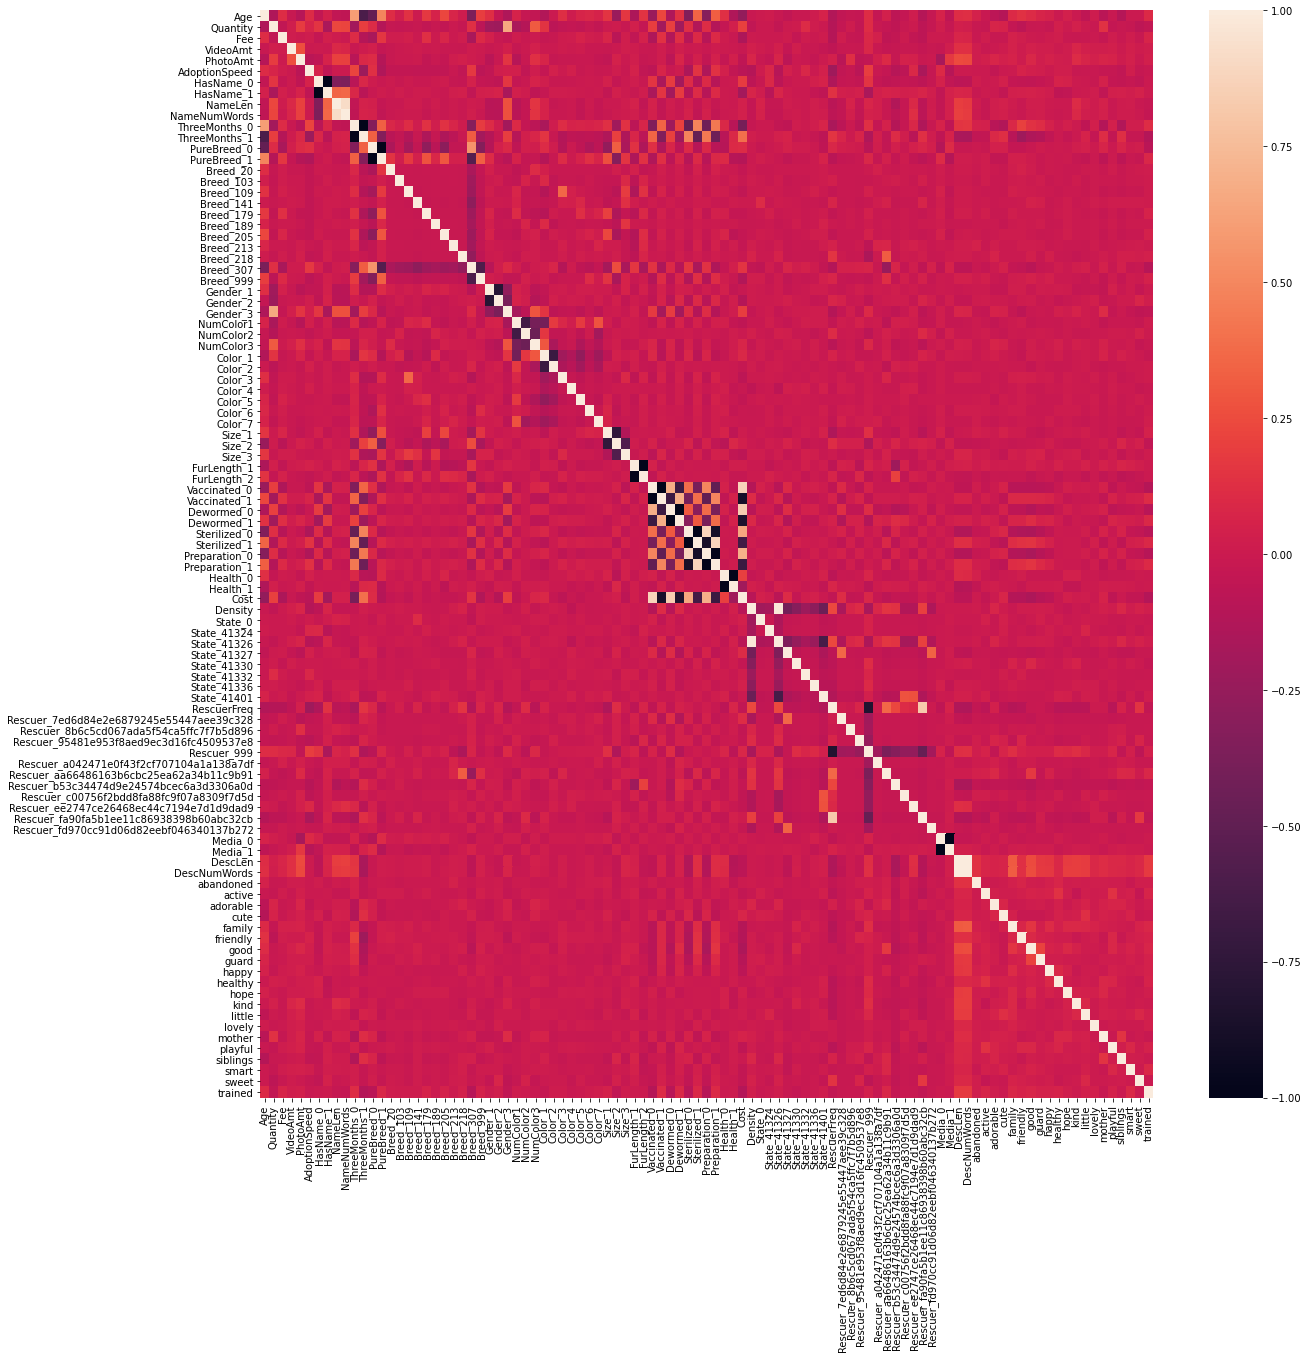

In [16]:
plt.figure(figsize=(20,20))
dogCorr = dogData.corr()
sns.heatmap(dogCorr, xticklabels=True, yticklabels=True)
plt.show()

In [17]:
dogCorr['AdoptionSpeed'].sort_values(ascending = False)

AdoptionSpeed                               1.000000
ThreeMonths_0                               0.221749
Rescuer_999                                 0.191426
Breed_307                                   0.167789
Sterilized_1                                0.147901
                                              ...   
Preparation_0                              -0.134943
Sterilized_0                               -0.147901
Rescuer_fa90fa5b1ee11c86938398b60abc32cb   -0.154560
RescuerFreq                                -0.206098
ThreeMonths_1                              -0.221749
Name: AdoptionSpeed, Length: 99, dtype: float64

From the heatmap and associated correlation values, we can see that dog AdoptionSpeed is most positively correlated (no adoption after 100 days) with:
<ul>
    <li> 'ThreeMonths_0': Is older than 3 months </li>
    <li> 'Rescuer_999': Is not rescued by the top 10 rescuers </li>
    <li> 'Breed_307': Dominant breed is mixed breed </li>
    <li> 'Sterilized_1': Is sterilized </li>

</ul>

and negatively correlated (adopted within 100 days) with:
<ul>
    <li> 'ThreeMonths_1': Is 3 months or younger </li>
    <li> 'RescuerFreq': Is rescued by a rescuer that has rescued alot of other dogs before </li>
    <li> 'Rescuer_fa90fa5b1ee11c86938398b60abc32cb': Is rescued by rescuer fa90fa5b1ee11c86938398b60abc32cb </li>    
    <li> 'Sterilized_0': Is not sterilized </li>
    <li> 'Preparation_0': Is not fully prepared for adoption </li>

</ul>


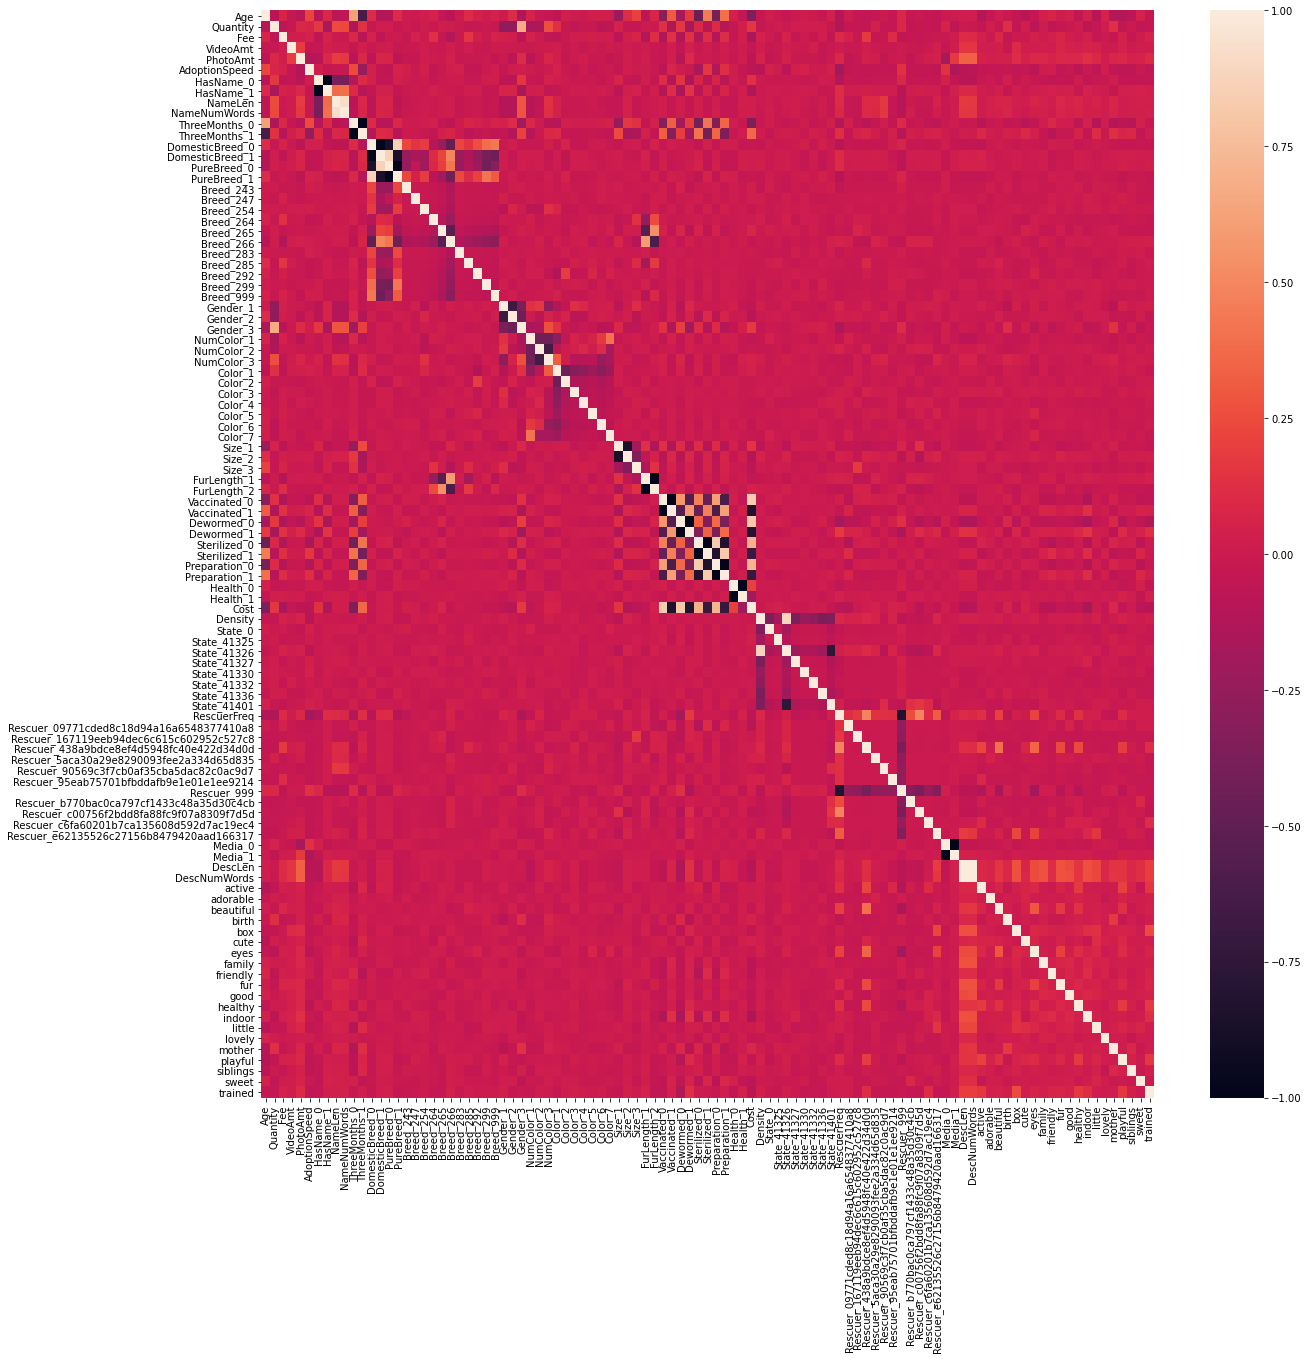

In [18]:
plt.figure(figsize=(20,20))
catCorr = catData.corr()
sns.heatmap(catCorr, xticklabels=True, yticklabels=True)
plt.show()

In [19]:
catCorr['AdoptionSpeed'].sort_values(ascending = False)

AdoptionSpeed    1.000000
ThreeMonths_0    0.244620
Age              0.218978
Sterilized_1     0.162493
Rescuer_999      0.140622
                   ...   
Preparation_0   -0.124637
Media_1         -0.135290
Sterilized_0    -0.162493
RescuerFreq     -0.196421
ThreeMonths_1   -0.244620
Name: AdoptionSpeed, Length: 101, dtype: float64

From the heatmap and associated correlation values, we can see that cat AdoptionSpeed is most positively correlated (no adoption after 100 days) with:
<ul>
    <li> 'Age': Age of the cat </li>
    <li> 'Sterilized_1': Is sterilized </li>
    <li> 'Media_0': Doesn't have any photos/videos on file </li>
    <li> 'Preparation_1': Is fully prepared for adoption </li>
</ul>

and negatively correlated (adopted within 100 days) with:
<ul>
    <li> 'Sterilized_0': Is not/unknown sterilized </li>
    <li> 'Media_1': Has at least 1 photos/video on file </li>
    <li> 'PhotoAmt': The number of photos on file </li>
    <li> 'Preparation_0': Is not fully prepared for adoption </li>
    <li> 'Density': states with a lower density of cats available for adoption </li>
</ul>



In [20]:
contCols = ['NameLen', 'NameNumWords', 'Age', 'Quantity', 'Fee', 'DescLen', 'DescNumWords', 'VideoAmt', 'PhotoAmt', 'Density', 'RescuerFreq'] 
dogCategCols = dogData.drop(columns = (contCols + ['AdoptionSpeed'])).columns 
catCategCols = catData.drop(columns = (contCols + ['AdoptionSpeed'])).columns

In [21]:
def scatterplots(columns, data, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = 'AdoptionSpeed', y = col, data=data, alpha=0.05)
        ax.set(xlabel='AdoptionSpeed', ylabel=col)
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

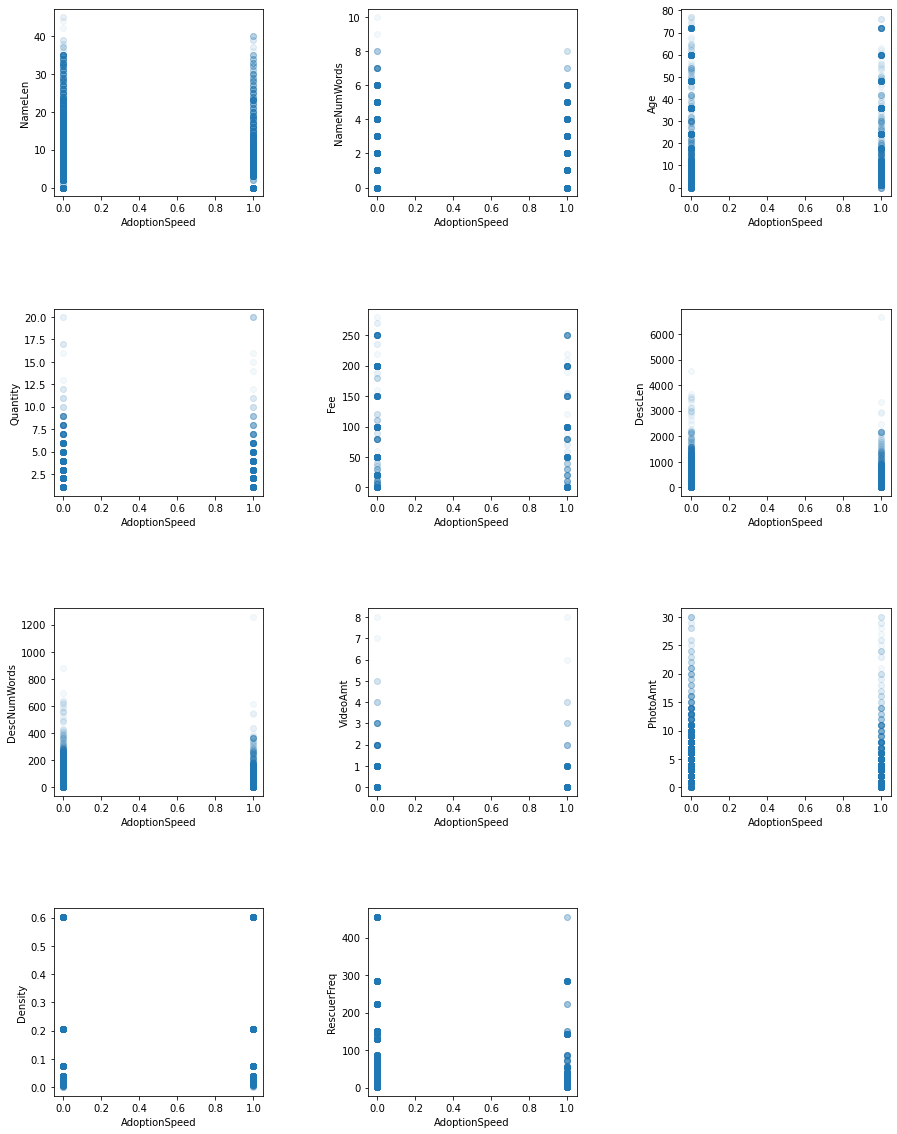

In [22]:
scatterplots(contCols, data = dogData, ncol=3, figsize=(15, 20))

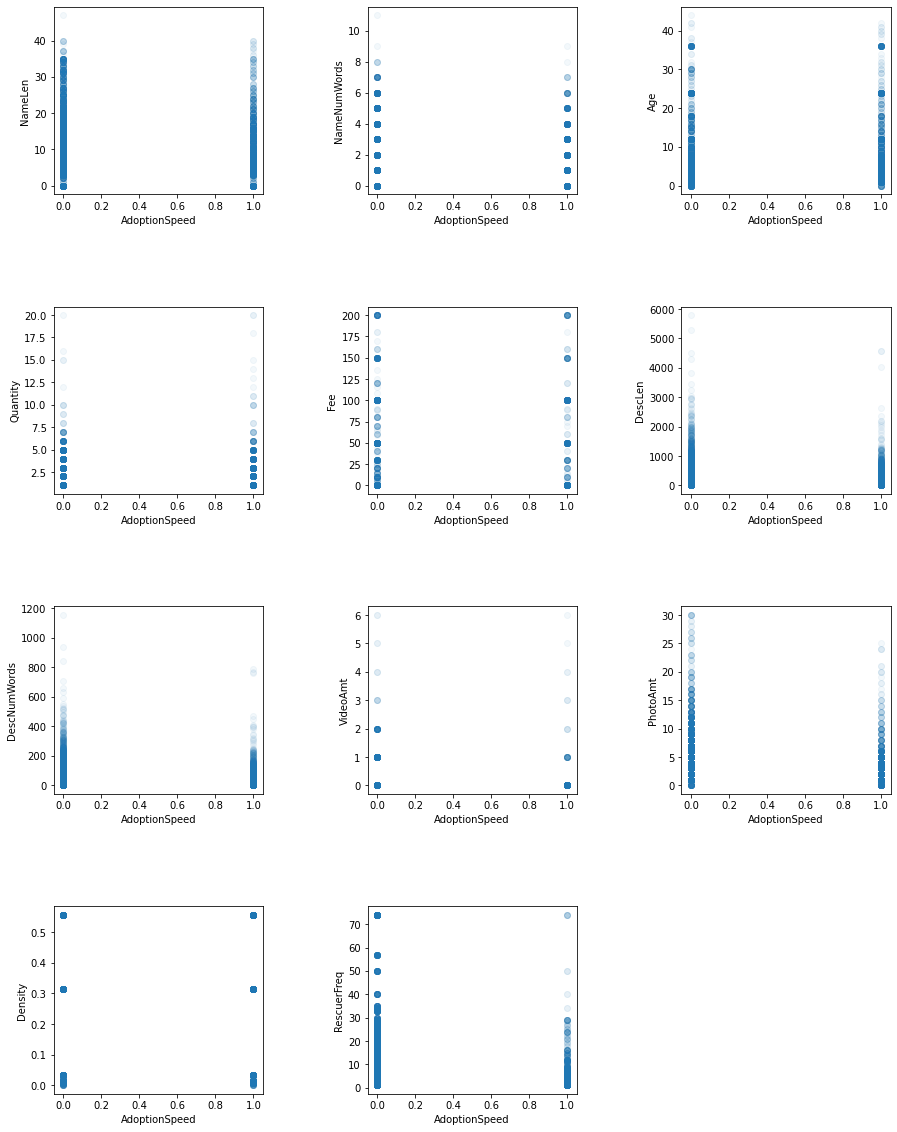

In [23]:
scatterplots(contCols, data = catData, ncol=3, figsize=(15, 20))

In [24]:
def countplots(columns, data, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        counts = data[data[col] == 1].AdoptionSpeed.value_counts()
        ax.bar(counts.index, counts.values)
        ax.set(xlabel='AdoptionSpeed', ylabel=col)
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

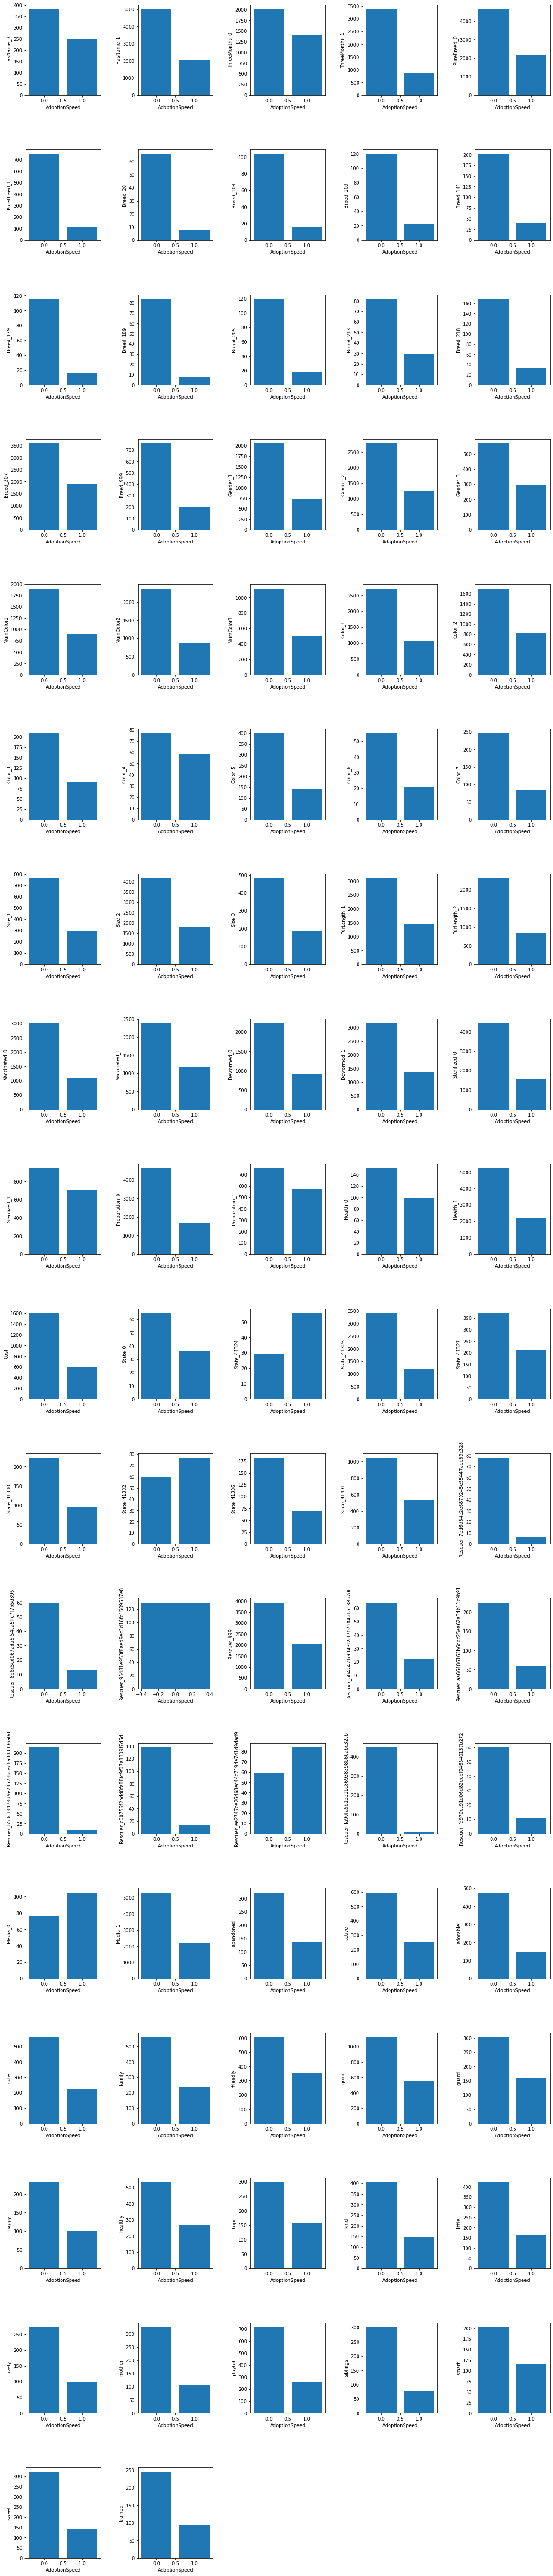

In [37]:
countplots(dogCategCols, dogData, ncol=5, figsize=(20, 100))

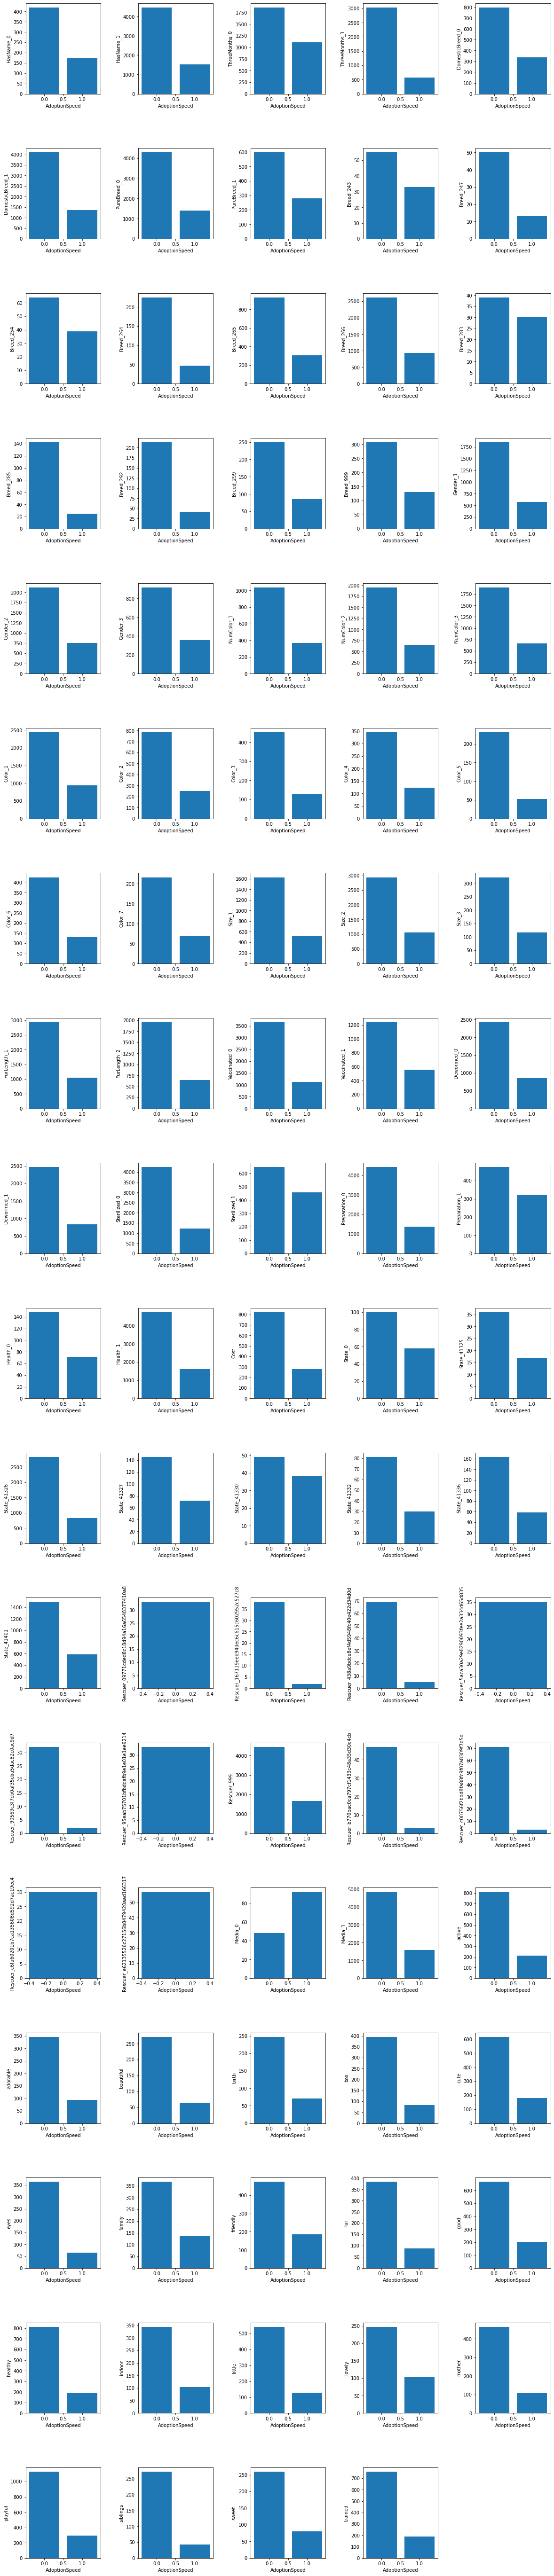

In [38]:
countplots(catCategCols, catData, ncol=5, figsize=(20, 100))